In [205]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [206]:
# defining my simulation constants
paycheck_norm = 4200
paycheck_std = 1000

In [207]:
# a regular transaction, for example a paycheck, electric bill or coffee
class RegTrans(object):
    def __init__(self, norm=-20, std=-2, period='weekly', date='random', time='random', desc='coffee'):
        self.amount = round(np.random.normal(loc=norm, scale=std), 2)
        self.period = period
        self.desc = desc
        if date == 'random':
            if self.period == 'monthly':
                self.date = np.random.randint(1,28)
            if self.period == 'weekly':
                self.date = np.random.randint(1,7)
                

In [208]:
# paycheck as a regular transaction
class Paycheck(RegTrans):
    def __init__(self):
        RegTrans.__init__(self, norm=paycheck_norm, std=paycheck_std, period='monthly', date='random', desc='paycheck')

In [218]:
# elec bill as a regular transaction
class ElecBill(RegTrans):
    def __init__(self):
        RegTrans.__init__(self, norm=-100, std=10, period='monthly', date='random', desc='elec_bill')

In [219]:
# a user, with a paycheck, bills and other regular payments
class User(object):
    def __init__(self):
        self.userid = np.random.randint(10**10) 
        self.paycheck = Paycheck()
        self.elec_bill = ElecBill()
        self.reg_trans = [self.paycheck, self.elec_bill]

In [220]:
# add a user's transactions to the DataFrame df
def add_user(df):
    user = User()
    for year in xrange(2013, 2016):
        for month in xrange(1, 12):
            for reg_trans in user.reg_trans:
                if reg_trans.period == 'monthly':
                    date = pd.datetime(year=year, month=month, day=reg_trans.date)
                    df.loc[len(df)] = [user.userid, reg_trans.amount, date, reg_trans.desc]

In [221]:
# define an empty DataFrame
trans = pd.DataFrame(columns=['userid', 'amount', 'date', 'desc'])

In [224]:
# add 50 users to the DataFrame
for i in xrange(50):
    add_user(trans)

In [225]:
len(trans)

9900

In [226]:
trans.head()

,userid,amount,date,desc
0,4140899731,4774.22,2013-01-12,paycheck
1,4140899731,-122.77,2013-01-25,elec_bill
2,4140899731,4774.22,2013-02-12,paycheck
3,4140899731,-122.77,2013-02-25,elec_bill
4,4140899731,4774.22,2013-03-12,paycheck


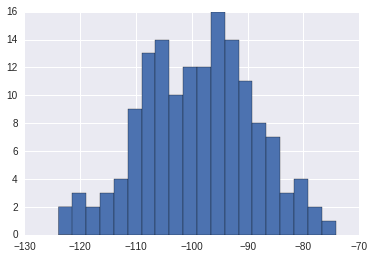

In [229]:
paychecks = trans[trans.desc == 'elec_bill'].groupby(trans.userid).mean().amount
paychecks.hist(bins=20)